# MLB DFS Capstone - Exploratory Data Analysis
Some of this might look familiar, as we might have taken some EDA-like steps during the Data Wrangling stage (or at least we like to think so).<br>

As a reminder, DFS is an acronym for daily fantasy sports.

In [231]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Target variables
FanDuel points and DraftKings points

# New set of CSVs
When we previously customized our CSVs in FanGraphs, we only included players with at least 30 plate appearances. However, by dropping those rows we left out some players who scored a lot of fantasy points on the observed dates. We should have just included everyone in the FanGraphs CSVs and let Pandas handle it if we needed to drop anyone.<br>

So that's what we did here. The process didn't take quite as long because we figured out how to change dates in the url and then copy and paste to get what we needed.<br>

As we'll see later, this creates some extreme outliers because some of these variables are percentages and players with very few plate appearances could have as much as 100 percent (or even more than that in one case) of certain stats.


In [232]:
list_of_dfs = []
date_of_games = pd.to_datetime('20210427', format = '%Y%m%d')
for i in range(121, 245, 4):
    date_of_games = date_of_games + datetime.timedelta(days = 4)
    if i == 193:
        continue
    L30_df = pd.read_csv("FGBatters_L30_" + str(i) + "_all.csv")
    L30_df.drop(columns = ['Team', 'playerid'], inplace = True)
    games_df = pd.read_csv("FGBattersFP_" + str(i) + ".csv")
    games_df = games_df[games_df['PA'] > 0]
    games_df.rename(columns = {'PA':'PA_Game'}, inplace = True)
    new_df = pd.merge(games_df, L30_df, how = 'left', on = 'Name')
    new_df.insert(0, 'Date', date_of_games)
    list_of_dfs.append(new_df)

In [233]:
main_df = pd.concat(list_of_dfs, ignore_index = True)

In [234]:
main_df.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,2021-05-01,Jurickson Profar,SDP,1,0,0,0,1,1,1,...,81.1%,45.9%,61.0%,8.1%,20.8%,51.4%,27.8%,36.1%,31.9%,31.9%
1,2021-05-01,Justin Williams,STL,1,0,0,0,1,2,1,...,67.0%,37.9%,53.9%,13.6%,13.2%,50.0%,36.8%,28.9%,47.4%,23.7%
2,2021-05-01,Andy Young,ARI,1,0,0,0,1,1,1,...,35.7%,32.7%,50.0%,18.4%,33.3%,0.0%,66.7%,0.0%,33.3%,66.7%
3,2021-05-01,Jared Walsh,LAA,5,2,0,0,2,3,2,...,79.5%,37.9%,46.2%,9.5%,31.3%,39.1%,29.7%,43.8%,35.9%,20.3%
4,2021-05-01,David Peralta,ARI,1,0,1,0,0,0,0,...,80.2%,43.8%,51.9%,8.9%,13.4%,52.4%,34.1%,31.7%,41.5%,26.8%


In [235]:
main_df.tail()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
8426,2021-08-29,Lars Nootbaar,STL,1,0,0,0,0,0,0,...,83.8%,43.1%,59.2%,6.1%,15.2%,57.6%,27.3%,33.3%,39.4%,27.3%
8427,2021-08-29,Cal Raleigh,SEA,3,0,0,0,0,0,0,...,65.1%,45.8%,72.7%,21.1%,20.5%,66.7%,12.8%,43.6%,30.8%,25.6%
8428,2021-08-29,Ryan Jeffers,MIN,4,0,0,0,0,0,0,...,74.0%,37.6%,59.7%,13.1%,20.6%,38.2%,41.2%,44.1%,44.1%,11.8%
8429,2021-08-29,Sam Long,SFG,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8430,2021-08-29,Kwang-hyun Kim,STL,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        8431 non-null   datetime64[ns]
 1   Name        8431 non-null   object        
 2   Team        8431 non-null   object        
 3   PA_Game     8431 non-null   int64         
 4   1B          8431 non-null   int64         
 5   2B          8431 non-null   int64         
 6   3B          8431 non-null   int64         
 7   HR          8431 non-null   int64         
 8   RBI         8431 non-null   int64         
 9   R           8431 non-null   int64         
 10  BB          8431 non-null   int64         
 11  SB          8431 non-null   int64         
 12  HBP         8431 non-null   int64         
 13  playerid    8431 non-null   int64         
 14  PA          7859 non-null   float64       
 15  Events      7859 non-null   float64       
 16  EV          7844 non-nul

In [237]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PA_Game,8431.0,3.596845,1.365334,1.0,3.000,4.000,4.000,9.000
1B,8431.0,0.500297,0.689331,0.0,0.000,0.000,1.000,4.000
2B,8431.0,0.154786,0.395857,0.0,0.000,0.000,0.000,3.000
3B,8431.0,0.011505,0.107756,0.0,0.000,0.000,0.000,2.000
HR,8431.0,0.116000,0.345545,0.0,0.000,0.000,0.000,3.000
RBI,8431.0,0.416321,0.828232,0.0,0.000,0.000,1.000,7.000
R,8431.0,0.435891,0.674137,0.0,0.000,0.000,1.000,5.000
BB,8431.0,0.312181,0.564714,0.0,0.000,0.000,1.000,4.000
SB,8431.0,0.039972,0.207662,0.0,0.000,0.000,0.000,3.000
HBP,8431.0,0.043530,0.209791,0.0,0.000,0.000,0.000,2.000


# Full games only (seen in Data Wrangling)
We're going to start trimming rows by only including players who appeared at the plate at least three times in their observed game. Most players with less than three plate appearances either were a substitute late in the game, and a daily fantasy baseball player would never knowingly roster a player who isn't starting, or the player was injured during the game. In the latter case it's an observation we'd want to dismiss.<br>

In [238]:
main_df = main_df[main_df['PA_Game'] >= 3]

In [239]:
main_df.reset_index(drop=True, inplace=True)

In [240]:
main_df.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,2021-05-01,Jared Walsh,LAA,5,2,0,0,2,3,2,...,79.5%,37.9%,46.2%,9.5%,31.3%,39.1%,29.7%,43.8%,35.9%,20.3%
1,2021-05-01,Andrew Benintendi,KCR,4,1,0,0,2,2,3,...,76.3%,43.4%,57.8%,11.4%,13.3%,60.0%,26.7%,35.0%,30.0%,35.0%
2,2021-05-01,Salvador Perez,KCR,3,0,1,0,1,3,2,...,67.1%,35.1%,67.6%,19.1%,20.3%,40.6%,39.1%,42.0%,31.9%,26.1%
3,2021-05-01,Willie Calhoun,TEX,4,1,1,0,1,2,2,...,83.1%,37.0%,55.6%,6.5%,20.6%,47.1%,32.4%,35.3%,35.3%,29.4%
4,2021-05-01,Jeimer Candelario,DET,4,2,0,0,1,1,1,...,77.7%,43.8%,76.1%,11.4%,23.0%,54.1%,23.0%,33.8%,37.8%,28.4%


In [241]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        6728 non-null   datetime64[ns]
 1   Name        6728 non-null   object        
 2   Team        6728 non-null   object        
 3   PA_Game     6728 non-null   int64         
 4   1B          6728 non-null   int64         
 5   2B          6728 non-null   int64         
 6   3B          6728 non-null   int64         
 7   HR          6728 non-null   int64         
 8   RBI         6728 non-null   int64         
 9   R           6728 non-null   int64         
 10  BB          6728 non-null   int64         
 11  SB          6728 non-null   int64         
 12  HBP         6728 non-null   int64         
 13  playerid    6728 non-null   int64         
 14  PA          6584 non-null   float64       
 15  Events      6584 non-null   float64       
 16  EV          6579 non-nul

# No double dipping (seen in Data Wrangling)
Some of the observed games are doubleheaders. FanDuel and DraftKings usually only put one game of a doubleheader on a slate, so you can only get points for what a player does in one game. But Pandas doesn't know that. We could have some high-scoring games that are due to a guy playing two games in one day. So let's drop all doubleheaders. This dictionary has the date of the game as the key and a list of all the teams that played doubleheaders on that day as the value.<br>

The for loop uses the dict in the following cell, and then we just test on a couple of those days to make sure it works.

In [242]:
doubleheader_dict = {'20210505': ['NYM', 'STL'], '20210529': ['COL', 'PIT', 'MIL', 'WSN', 'BAL', 'CHW'], \
                     '20210626': ['HOU', 'DET'], '20210630': ['DET', 'CLE'], '20210704': ['NYY', 'NYM'], \
                     '20210716': ['MIA', 'PHI'], '20210728': ['TOR', 'BOS'], '20210817': ['BOS', 'NYY'], \
                    '20210825': ['COL', 'CHC'], }

In [243]:
for key, value in doubleheader_dict.items():
    temp_date = pd.to_datetime(key, format = '%Y%m%d')
    main_df = main_df.loc[~((main_df['Date'] == temp_date) & (main_df['Team'].isin(value))), :]

In [244]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6487 entries, 0 to 6727
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        6487 non-null   datetime64[ns]
 1   Name        6487 non-null   object        
 2   Team        6487 non-null   object        
 3   PA_Game     6487 non-null   int64         
 4   1B          6487 non-null   int64         
 5   2B          6487 non-null   int64         
 6   3B          6487 non-null   int64         
 7   HR          6487 non-null   int64         
 8   RBI         6487 non-null   int64         
 9   R           6487 non-null   int64         
 10  BB          6487 non-null   int64         
 11  SB          6487 non-null   int64         
 12  HBP         6487 non-null   int64         
 13  playerid    6487 non-null   int64         
 14  PA          6348 non-null   float64       
 15  Events      6348 non-null   float64       
 16  EV          6343 non-nul

# Calculating target variables

While home runs are far and away the most important component of MLB DFS production, we also need to look at singles, doubles, triples, runs scored, runs batted in, stolen bases, walks and hit-by-pitcher to get complete scoring on FanDuel and DraftKings.<br>

**This is being done a little earlier in the notebook than it was in the Data Wrangling notebook.**<br>

In [245]:
main_df['FD_Pts'] = (main_df['1B'] * 3) + (main_df['2B'] * 6) + (main_df['3B'] * 9) + (main_df['HR'] * 12) \
+ (main_df['RBI'] * 3.5) + (main_df['R'] * 3.2) + (main_df['BB'] * 3) + (main_df['SB'] * 6) + (main_df['HBP'] * 3) 

In [246]:
main_df['DK_Pts'] = (main_df['1B'] * 3) + (main_df['2B'] * 5) + (main_df['3B'] * 8) + (main_df['HR'] * 10) \
+ (main_df['RBI'] * 2) + (main_df['R'] * 2) + (main_df['BB'] * 2) + (main_df['SB'] * 5) + (main_df['HBP'] * 2) 

# Weeding out pitchers
One side effect of not setting a floor on plate appearances is that pitchers are included in the CSVs. Although pitchers bat in the National League (this might be the last year of that), they are not available to be drafted as hitters in DFS. So we'll go back into FanGraphs and create a CSV of hopefully everyone who has pitched in 2021, and use it to drop the pitcher rows from our main_df.

In [247]:
pitchers = pd.read_csv('FG_Pitcher_Names_2021.csv')

In [248]:
pitchers.head()

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,...,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,playerid
0,Corbin Burnes,MIL,11,5,0,28,28,167.0,12.61,1.83,...,75.7%,48.8%,6.1%,96.5,2.43,2.01,1.63,2.30,7.5,19361
1,Zack Wheeler,PHI,14,10,0,32,32,213.1,10.42,1.94,...,75.3%,49.8%,10.8%,97.3,2.78,2.78,2.59,2.84,7.3,10310
2,Nathan Eovaldi,BOS,11,9,0,32,32,182.1,9.63,1.73,...,70.4%,42.0%,8.2%,97.1,3.75,3.37,2.79,3.48,5.6,9132
3,Walker Buehler,LAD,16,4,0,33,33,207.2,9.19,2.25,...,80.9%,44.7%,10.1%,95.5,2.47,3.08,3.15,3.57,5.5,19374
4,Max Scherzer,- - -,15,4,0,30,30,179.1,11.84,1.81,...,84.3%,33.5%,11.7%,94.5,2.46,2.89,2.97,3.24,5.4,3137


In [249]:
pitchers_names = list(pitchers['Name'])

In [250]:
for i in range(len(pitchers_names)):
    main_df = main_df.loc[main_df['Name'] != pitchers_names[i], :]
    

In [251]:
main_df.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%,FD_Pts,DK_Pts
0,2021-05-01,Jared Walsh,LAA,5,2,0,0,2,3,2,...,46.2%,9.5%,31.3%,39.1%,29.7%,43.8%,35.9%,20.3%,49.9,38
1,2021-05-01,Andrew Benintendi,KCR,4,1,0,0,2,2,3,...,57.8%,11.4%,13.3%,60.0%,26.7%,35.0%,30.0%,35.0%,43.6,33
2,2021-05-01,Salvador Perez,KCR,3,0,1,0,1,3,2,...,67.6%,19.1%,20.3%,40.6%,39.1%,42.0%,31.9%,26.1%,34.9,25
3,2021-05-01,Willie Calhoun,TEX,4,1,1,0,1,2,2,...,55.6%,6.5%,20.6%,47.1%,32.4%,35.3%,35.3%,29.4%,34.4,26
4,2021-05-01,Jeimer Candelario,DET,4,2,0,0,1,1,1,...,76.1%,11.4%,23.0%,54.1%,23.0%,33.8%,37.8%,28.4%,24.7,20


In [252]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5905 entries, 0 to 6727
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5905 non-null   datetime64[ns]
 1   Name        5905 non-null   object        
 2   Team        5905 non-null   object        
 3   PA_Game     5905 non-null   int64         
 4   1B          5905 non-null   int64         
 5   2B          5905 non-null   int64         
 6   3B          5905 non-null   int64         
 7   HR          5905 non-null   int64         
 8   RBI         5905 non-null   int64         
 9   R           5905 non-null   int64         
 10  BB          5905 non-null   int64         
 11  SB          5905 non-null   int64         
 12  HBP         5905 non-null   int64         
 13  playerid    5905 non-null   int64         
 14  PA          5838 non-null   float64       
 15  Events      5838 non-null   float64       
 16  EV          5835 non-nul

# Let's take a look at these missing values
We'll slice the rows with any null values from the dataframe and take a closer look at the missing values.

In [253]:
main_df_with_nulls = main_df[main_df.isna().any(axis=1)]

In [254]:
main_df_with_nulls.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%,FD_Pts,DK_Pts
124,2021-05-01,Yu-Cheng Chang,CLE,3,1,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7
234,2021-05-01,Austin Nola,SDP,3,0,0,0,0,0,0,...,NaN,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0,0
247,2021-05-01,Daniel Johnson Jr.,CLE,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
372,2021-05-05,Hunter Owen,PIT,3,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2
374,2021-05-05,Reese McGuire,TOR,3,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2


In [255]:
main_df_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 124 to 6725
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        87 non-null     datetime64[ns]
 1   Name        87 non-null     object        
 2   Team        87 non-null     object        
 3   PA_Game     87 non-null     int64         
 4   1B          87 non-null     int64         
 5   2B          87 non-null     int64         
 6   3B          87 non-null     int64         
 7   HR          87 non-null     int64         
 8   RBI         87 non-null     int64         
 9   R           87 non-null     int64         
 10  BB          87 non-null     int64         
 11  SB          87 non-null     int64         
 12  HBP         87 non-null     int64         
 13  playerid    87 non-null     int64         
 14  PA          20 non-null     float64       
 15  Events      20 non-null     float64       
 16  EV          17 non-null 

Here we see that while most of the players with missing values have little or no fantasy points, there are a few with a lot.

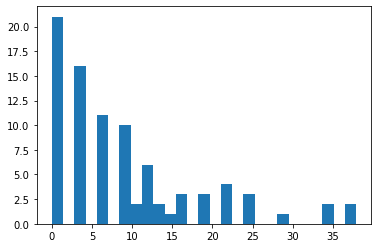

In [256]:
plt.hist(main_df_with_nulls['FD_Pts'], bins = 27);

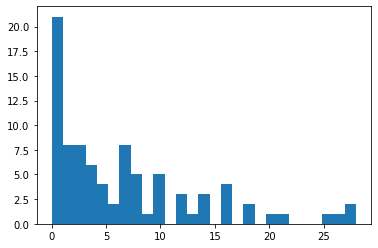

In [257]:
plt.hist(main_df_with_nulls['DK_Pts'], bins = 27);

In [258]:
main_df_with_nulls.describe().T

,count,mean,std,min,25%,50%,75%,max
PA_Game,87.0,3.954023,0.713785,3.0,3.5,4.0000,4.0000,6.000
1B,87.0,0.402299,0.599608,0.0,0.0,0.0000,1.0000,2.000
2B,87.0,0.172414,0.409393,0.0,0.0,0.0000,0.0000,2.000
3B,87.0,0.034483,0.183523,0.0,0.0,0.0000,0.0000,1.000
HR,87.0,0.149425,0.358574,0.0,0.0,0.0000,0.0000,1.000
RBI,87.0,0.494253,0.847343,0.0,0.0,0.0000,1.0000,3.000
R,87.0,0.448276,0.642644,0.0,0.0,0.0000,1.0000,2.000
BB,87.0,0.333333,0.584025,0.0,0.0,0.0000,1.0000,2.000
SB,87.0,0.057471,0.234090,0.0,0.0,0.0000,0.0000,1.000
HBP,87.0,0.045977,0.210649,0.0,0.0,0.0000,0.0000,1.000


In [259]:
main_df.isnull().sum().sum()

2951

In [260]:
87/5905

0.014733276883996614

# Dropping nulls
What we just calculated is that we would lose 1.5% of the data by dropping these 87 rows. We could impute with means, but that wouldn't work for plate appearances since most of these players have very few plate appearances. We have well over 5000 observations to help us find out which variables correlate to fantasy points and can probably do without 87 of them.

In [261]:
main_df.dropna(inplace=True)
main_df.reset_index(drop=True, inplace = True)

In [262]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5818 non-null   datetime64[ns]
 1   Name        5818 non-null   object        
 2   Team        5818 non-null   object        
 3   PA_Game     5818 non-null   int64         
 4   1B          5818 non-null   int64         
 5   2B          5818 non-null   int64         
 6   3B          5818 non-null   int64         
 7   HR          5818 non-null   int64         
 8   RBI         5818 non-null   int64         
 9   R           5818 non-null   int64         
 10  BB          5818 non-null   int64         
 11  SB          5818 non-null   int64         
 12  HBP         5818 non-null   int64         
 13  playerid    5818 non-null   int64         
 14  PA          5818 non-null   float64       
 15  Events      5818 non-null   float64       
 16  EV          5818 non-nul

In [263]:
print(all(main_df))

True


# Here's what we still have
This histogram shows that more than 400 observations in our dataframe involve players with less than 30 PAs in the previous 30 days. And then we see that 8.5 percent of our observed batters had 30 or less PAs in the previous 30 days (we'll admit that we should have used numpy's percentileofscore but instead just kept changing the argument in np.percentile to get 30. We also see that 97.5 percent of our batters have at least 11 plate appearances in the previous 30 days.<br>
So even after dropping nulls we're still adding observations by casting a wider net with our original CSVs.

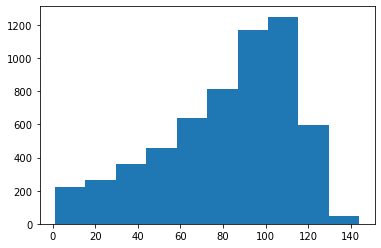

In [264]:
plt.hist(main_df['PA'], bins = 10);

In [265]:
np.percentile(main_df['PA'], 2.5), np.percentile(main_df['PA'], 5), np.percentile(main_df['PA'], 8.5)

(11.0, 19.0, 30.0)

# Handedness
This should look familiar, but our additional observations might create more missing values here.

In [266]:
rhh_df = pd.read_csv("FGBatters_vsLasR.csv")
lhh_df = pd.read_csv("FGBatters_vsRasL.csv")

In [267]:
rhh_df = rhh_df[['Name']]
lhh_df = lhh_df[['Name']]

In [268]:
righties_set = set(rhh_df['Name'])
lefties_set = set(lhh_df['Name'])

In [269]:
righties_only = list(righties_set.difference(lefties_set))
lefties_only = list(lefties_set.difference(righties_set))
switch = list(righties_set.intersection(lefties_set))

In [270]:
conds = [main_df['Name'].isin(righties_only), main_df['Name'].isin(lefties_only), main_df['Name'].isin(switch)]
choices = ['R', 'L', 'S']

In [271]:
main_df['Bats'] = np.select(conds, choices)

In [272]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5818 non-null   datetime64[ns]
 1   Name        5818 non-null   object        
 2   Team        5818 non-null   object        
 3   PA_Game     5818 non-null   int64         
 4   1B          5818 non-null   int64         
 5   2B          5818 non-null   int64         
 6   3B          5818 non-null   int64         
 7   HR          5818 non-null   int64         
 8   RBI         5818 non-null   int64         
 9   R           5818 non-null   int64         
 10  BB          5818 non-null   int64         
 11  SB          5818 non-null   int64         
 12  HBP         5818 non-null   int64         
 13  playerid    5818 non-null   int64         
 14  PA          5818 non-null   float64       
 15  Events      5818 non-null   float64       
 16  EV          5818 non-nul

In [273]:
main_df['Bats'].unique()

array(['L', 'R', 'S', '0'], dtype=object)

# More observations, more problems
In the Data Wrangling stage, we discovered there were 13 players with '0' for a 'Bats' value. It wasn't too hard checking Baseball Reference to get batting handedness for each player. It turned out they were all righties so we just needed one line of code to fix the problem. Now that we've opened the gates to more players, we end with with 45 without a legitimate 'Bats' value. Well, we've done more time-consuming things before without even getting what we needed. Plus, most will be righties anyway. It will take a couple of seconds to verify that for most of them.<br>

In [274]:
missing_bat_hand = main_df[main_df['Bats'] == '0']

In [275]:
missing_bat_hand['Name'].unique()

array(['Cristian Pache', 'Chad Wallach', 'Tony Wolters', 'Aramis Garcia',
       'Grayson Greiner', 'Nick Senzel', 'Alan Trejo', 'Todd Frazier',
       'Drew Butera', 'Jeff Mathis', 'Johneshwy Fargas',
       'Jacob Nottingham', 'Cameron Maybin', 'Will Craig', 'Max Moroff',
       'P.J. Higgins', 'Eric Campbell', 'Webster Rivas', 'Mason Williams',
       'Chris Gittens', 'Ryan Lavarnway', 'Steven Souza Jr.',
       'Jake Burger', 'Sebastian Rivero', 'Jared Oliva', 'Orlando Arcia',
       'Chris Owings', 'Tres Barrera', 'Vidal Brujan', 'Stuart Fairchild',
       'Estevan Florial', 'Rob Brantly', 'Curtis Terry', 'Adrian Sanchez',
       'Matt Thaiss', 'Jake Hager', 'Jacob Wilson', 'Austin Romine',
       'Renato Nunez', 'Yohel Pozo', 'Michael Hermosillo',
       'Dustin Garneau', 'Jahmai Jones', 'Kevin Smith', 'Jorge Bonifacio'],
      dtype=object)

In [276]:
len(missing_bat_hand)

85

In [277]:
len(missing_bat_hand['Name'].unique())

45

We have some lefties and switch-hitters here. So we make a list for each.

In [278]:
missing_lefties = ['Tony Wolters', 'Mason Williams', 'Estevan Florial', 'Rob Brantly', 'Matt Thaiss', 'Austin Allen']
missing_switch = ['Max Moroff', 'Vidal Brujan', 'Taylor Gushue']

In [279]:
main_df.columns.get_loc('Name')

1

In [280]:
main_df.columns.get_loc('Bats')

59

This for loop will fill in the values.

In [281]:
for i in range(len(main_df)):
    if main_df.iloc[i, 59] == '0':
        if main_df.iloc[i, 1] in missing_lefties:
            main_df.iloc[i, 59] = 'L'
        elif main_df.iloc[i, 1] in missing_switch:
            main_df.iloc[i, 59] = 'S'
        else:
            main_df.iloc[i, 59] = 'R'

In [282]:
main_df['Bats'].unique()

array(['L', 'R', 'S'], dtype=object)

# Odds (just one small change)
The only change to this entire Odds process is that we're keeping combined over-under for both teams 'OpenOU' as a variable. We previously used it to figure projected runs for each team and then dropped it.<br>

**At this point, there are no significant changes from Data Wrangling until the cell headlined "Data Wrangling is now closed."**

In [283]:
odds_df = pd.read_excel("MLBOdds_1005.xlt")

In [284]:
odds_df.head()

,Date,VH,Team,Pitcher,Open,OpenOU
0,501,V,MIA,PCAMPBELL,105,8.5
1,501,H,WAS,PCORBIN-L,-125,8.5
2,501,V,CUB,ZDAVIES,135,9.0
3,501,H,CIN,LCASTILLO,-160,9.0
4,501,V,NYM,TWALKER,100,7.5


In [285]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     766 non-null    int64  
 1   VH       766 non-null    object 
 2   Team     766 non-null    object 
 3   Pitcher  766 non-null    object 
 4   Open     766 non-null    int64  
 5   OpenOU   766 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 36.0+ KB


The three-letter team codes in our odds dataframe don't all match up with the ones in our main dataframe. We'll just create a dict by hand to get them to match.

In [286]:
team_codes = main_df['Team'].unique()

In [287]:
team_codes

array(['LAA', 'KCR', 'TEX', 'DET', 'ARI', 'PHI', 'CHC', 'STL', 'NYM',
       'ATL', 'COL', 'TOR', 'LAD', 'WSN', 'BOS', 'OAK', 'MIL', 'SEA',
       'CHW', 'MIA', 'CLE', 'PIT', 'NYY', 'CIN', 'SDP', 'MIN', 'SFG',
       'BAL', 'HOU', 'TBR'], dtype=object)

In [288]:
odds_team_dict = {'SDG':'SDP', 'CWS':'CHW', 'SFO':'SFG', 'KAN':'KCR', 'WAS': 'WSN', 'TAM': 'TBR', 'CUB': 'CHC'}

In [289]:
odds_df['Team'].replace(odds_team_dict, inplace = True)

In [290]:
odds_df.head(10)

,Date,VH,Team,Pitcher,Open,OpenOU
0,501,V,MIA,PCAMPBELL,105,8.5
1,501,H,WSN,PCORBIN-L,-125,8.5
2,501,V,CHC,ZDAVIES,135,9.0
3,501,H,CIN,LCASTILLO,-160,9.0
4,501,V,NYM,TWALKER,100,7.5
5,501,H,PHI,ZWHEELER,-120,7.5
6,501,V,STL,JFLAHERTY,-135,7.5
7,501,H,PIT,TCAHILL,115,7.5
8,501,V,LAD,DMAY,-115,7.0
9,501,H,MIL,BWOODRUFF,-105,7.0


# Missing game
Just to spare you some details on how the sausage was made, we'll just say that at some point we discovered one game we didn't have odds for, so we scrounged up odds from another site and we'll add the rows here. Then we'll call the dataframe tail to make sure it's there.

In [291]:
newrow1 = {'Date': 626, 'VH':'V', 'Team': 'SEA', 'Pitcher': 'GILBERT', 'Open': 165, 'OpenOU': 8.0}

In [292]:
newrow2 = {'Date': 626, 'VH':'H', 'Team': 'CHW', 'Pitcher': 'LYNN', 'Open': -195, 'OpenOU': 8.0}

In [293]:
odds_df = odds_df.append([newrow1], ignore_index = True)

In [294]:
odds_df = odds_df.append([newrow2], ignore_index = True)

In [295]:
odds_df.tail()

,Date,VH,Team,Pitcher,Open,OpenOU
763,829,H,CHW,DCEASE,-210,8.5
764,829,V,MIL,AASHBY-L,-140,10.0
765,829,H,MIN,GJAX,120,10.0
766,626,V,SEA,GILBERT,165,8.0
767,626,H,CHW,LYNN,-195,8.0


# Getting each game in a single row (seen in Data Wrangling)
Now we'll manipulate the odds dataframe so that all the features of each game are on a single row. We'll confirm that all the even indexes are visiting teams and all the odd indexes are home teams and drop the 'VH' column.<br>

Then the split_odds_df function basically takes indexes as arguments. The step part of the slice will be 2 both times since we're slicing every other row both times. The odds_df_v df will have the date of the game and the odds_df_h will have the over/under (predicted combined runs for each team).<br>

We rename columns to make home and visiting teams clear and put the dataframes back together in odds_df_all.

In [296]:
odds_df.iloc[0::2, 1].unique()

array(['V'], dtype=object)

In [297]:
odds_df.iloc[1::2, 1].unique()

array(['H'], dtype=object)

In [298]:
odds_df.drop(columns = 'VH', inplace = True)

In [299]:
def split_odds_df(first_row, first_col, last_col):
    odds_df_split = odds_df.iloc[first_row::2, first_col:last_col]
    odds_df_split.reset_index(drop = True, inplace = True)
    return odds_df_split

In [300]:
odds_df_v = split_odds_df(0, 0, -1)

In [301]:
odds_df_v.head()

,Date,Team,Pitcher,Open
0,501,MIA,PCAMPBELL,105
1,501,CHC,ZDAVIES,135
2,501,NYM,TWALKER,100
3,501,STL,JFLAHERTY,-135
4,501,LAD,DMAY,-115


In [302]:
odds_df_v.rename(columns = {'Team': 'V_Team', 'Pitcher': 'V_Pitcher', 'Open': 'V_Open'}, inplace = True)

In [303]:
odds_df_v.head()

,Date,V_Team,V_Pitcher,V_Open
0,501,MIA,PCAMPBELL,105
1,501,CHC,ZDAVIES,135
2,501,NYM,TWALKER,100
3,501,STL,JFLAHERTY,-135
4,501,LAD,DMAY,-115


In [304]:
odds_df_h = split_odds_df(1, 1, 5)

In [305]:
odds_df_h.head()

,Team,Pitcher,Open,OpenOU
0,WSN,PCORBIN-L,-125,8.5
1,CIN,LCASTILLO,-160,9.0
2,PHI,ZWHEELER,-120,7.5
3,PIT,TCAHILL,115,7.5
4,MIL,BWOODRUFF,-105,7.0


In [306]:
odds_df_h.rename(columns = {'Team':'H_Team', 'Pitcher':'H_Pitcher', 'Open': 'H_Open'}, inplace = True)

In [307]:
odds_df_h.head()

,H_Team,H_Pitcher,H_Open,OpenOU
0,WSN,PCORBIN-L,-125,8.5
1,CIN,LCASTILLO,-160,9.0
2,PHI,ZWHEELER,-120,7.5
3,PIT,TCAHILL,115,7.5
4,MIL,BWOODRUFF,-105,7.0


In [308]:
odds_df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       384 non-null    int64 
 1   V_Team     384 non-null    object
 2   V_Pitcher  384 non-null    object
 3   V_Open     384 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.1+ KB


In [309]:
odds_df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   H_Team     384 non-null    object 
 1   H_Pitcher  384 non-null    object 
 2   H_Open     384 non-null    int64  
 3   OpenOU     384 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.1+ KB


In [310]:
odds_df_all = odds_df_v.join(odds_df_h, how = 'left')

In [311]:
odds_df_all.head(10)

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU
0,501,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5
1,501,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0
2,501,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5
3,501,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5
4,501,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0
5,501,COL,AGOMBER-L,150,ARI,ZGALLEN,-180,8.0
6,501,SFG,ADESCLAFA,145,SDP,BSNELL-L,-170,7.0
7,501,DET,STURNBULL,175,NYY,JTAILLON,-210,8.0
8,501,KCR,DDUFFY-L,-105,MIN,MSHOEMAKE,-115,9.0
9,501,CLE,TMCKENZIE,145,CHW,LLYNN,-170,8.5


# Distribution of money lines
Rather than point spreads, which are used in sports like basketball and football, baseball betting is based on money lines. Favorites have a money line that starts with a minus and underdogs have one that starts with a plus.<br>

If you bet on a -150 favorite, you'd have to bet 150 dollars to win back your money plus 100 dollars. If you bet on a +150 underdog, you can bet 100 and make that back plus 150 if your team wins. This is why money lines are always 100 or more either way.<br>

Here's a look at the distribution of money lines in odds_df_all.

<AxesSubplot:>

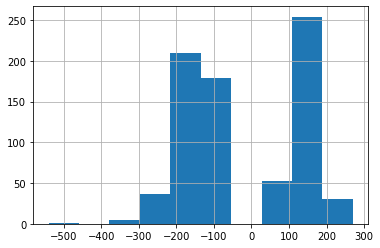

In [312]:
odds_df['Open'].hist()

# A little math
Now we'll use the money line and over-under to derive a projected-runs feature for each team in each game.<br>

We'll start by creating a win probability column for each team and assigning .5 as a baseline value.

In [313]:
odds_df_all['V_Win_Prob'] = .5
odds_df_all['H_Win_Prob'] = .5

In [314]:
odds_df_all.head()

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob
0,501,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5,0.5,0.5
1,501,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0,0.5,0.5
2,501,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5,0.5,0.5
3,501,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5,0.5,0.5
4,501,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0,0.5,0.5


# Algorithm to process money lines
If a moneyline is +300 or more, the team automatically is given a win probability of .25. If it's -300 or more the other way, the probability is .75.<br>

In all other cases, we add 100 to underdog lines and subtract 100 from favorite lines so they meet at zero, then add 200 to all of them so we have a number between 0 and 400. We multiply by .00125. The higher the number (remember underdogs' money lines start with a + sign), the less of a probability that team has to win, so that scaled number between 0 and 400 multiplied by .00125 is subtracted from .75, our highest possible win probabilty.

In [315]:
def create_win_prob(df, col1, col2):
    for i in range(len(df)):
        moneyline = df.iloc[i, col1]
        overunder = df.iloc[i, 7]
        if moneyline < -300:
            df.iloc[i, col2] = .75
        elif moneyline > 300:
            df.iloc[i, col2] = .25
        else:
            if moneyline < 0:
                moneyline = moneyline + 100
            else:
                moneyline = moneyline - 100
            moneyline = moneyline + 200
            win_prob = .75 - moneyline * .00125
            df.iloc[i, col2] = win_prob

In [316]:
create_win_prob(odds_df_all, 3, 8)
create_win_prob(odds_df_all, 6, 9)
#create_proj_runs(odds_df_all, 3, 8)
#create_proj_runs(odds_df_all, 6, 9)

In [317]:
odds_df_all.head(30)

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob
0,501,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5,0.49375,0.53125
1,501,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0,0.45625,0.57500
2,501,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5,0.50000,0.52500
3,501,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5,0.54375,0.48125
4,501,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0,0.51875,0.50625
5,501,COL,AGOMBER-L,150,ARI,ZGALLEN,-180,8.0,0.43750,0.60000
6,501,SFG,ADESCLAFA,145,SDP,BSNELL-L,-170,7.0,0.44375,0.58750
7,501,DET,STURNBULL,175,NYY,JTAILLON,-210,8.0,0.40625,0.63750
8,501,KCR,DDUFFY-L,-105,MIN,MSHOEMAKE,-115,9.0,0.50625,0.51875
9,501,CLE,TMCKENZIE,145,CHW,LLYNN,-170,8.5,0.44375,0.58750


# That doesn't add up
Most of these win probabilities add up to a number greater than one because the money lines aren't symmetrical. In Miami at Washington, our first game on May 1, Washington is a -125 favorite. We'd expect, then, that Miami would be a +125 underdog, but instead they're +105. We're not experts here when it comes to betting on games, but the theory is that Vegas wouldn't make money if the money lines matched up on both sides.<br>

So what we'll do is figure out the difference between the total of the win probabilities and 1 (prob_overset), split that number and subtract equally from both V_Win_Prob and H_Win_Prob.


In [318]:
odds_df_all['prob_overset'] = odds_df_all['V_Win_Prob'] + odds_df_all['H_Win_Prob'] - 1
odds_df_all['V_Win_Prob'] = odds_df_all['V_Win_Prob'] - odds_df_all['prob_overset'] / 2
odds_df_all['H_Win_Prob'] = odds_df_all['H_Win_Prob'] - odds_df_all['prob_overset'] / 2

In [319]:
odds_df_all.head(30)

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob,prob_overset
0,501,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5,0.481250,0.518750,0.02500
1,501,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0,0.440625,0.559375,0.03125
2,501,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5,0.487500,0.512500,0.02500
3,501,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5,0.531250,0.468750,0.02500
4,501,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0,0.506250,0.493750,0.02500
5,501,COL,AGOMBER-L,150,ARI,ZGALLEN,-180,8.0,0.418750,0.581250,0.03750
6,501,SFG,ADESCLAFA,145,SDP,BSNELL-L,-170,7.0,0.428125,0.571875,0.03125
7,501,DET,STURNBULL,175,NYY,JTAILLON,-210,8.0,0.384375,0.615625,0.04375
8,501,KCR,DDUFFY-L,-105,MIN,MSHOEMAKE,-115,9.0,0.493750,0.506250,0.02500
9,501,CLE,TMCKENZIE,145,CHW,LLYNN,-170,8.5,0.428125,0.571875,0.03125


# Splitting the over-under
Finally, we'll multiply these win probabilities for each team by the over-under to get a projected run total for both teams in each game.<br>

In lieu of the specific pitcher a team is facing and his stats, this projected runs metric hints at the quality of pitcher a player will face in that game. A high projected run total suggests that the batter is facing a weak pitcher and has a good chance to score a lot of fantasy points.<br>

In [320]:
odds_df_all['V_Proj_Runs'] = odds_df_all['V_Win_Prob'] * odds_df_all['OpenOU']

In [321]:
odds_df_all['H_Proj_Runs'] = odds_df_all['H_Win_Prob'] * odds_df_all['OpenOU']

In [322]:
odds_df_all.head(50)

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob,prob_overset,V_Proj_Runs,H_Proj_Runs
0,501,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5,0.481250,0.518750,0.02500,4.090625,4.409375
1,501,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0,0.440625,0.559375,0.03125,3.965625,5.034375
2,501,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5,0.487500,0.512500,0.02500,3.656250,3.843750
3,501,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5,0.531250,0.468750,0.02500,3.984375,3.515625
4,501,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0,0.506250,0.493750,0.02500,3.543750,3.456250
5,501,COL,AGOMBER-L,150,ARI,ZGALLEN,-180,8.0,0.418750,0.581250,0.03750,3.350000,4.650000
6,501,SFG,ADESCLAFA,145,SDP,BSNELL-L,-170,7.0,0.428125,0.571875,0.03125,2.996875,4.003125
7,501,DET,STURNBULL,175,NYY,JTAILLON,-210,8.0,0.384375,0.615625,0.04375,3.075000,4.925000
8,501,KCR,DDUFFY-L,-105,MIN,MSHOEMAKE,-115,9.0,0.493750,0.506250,0.02500,4.443750,4.556250
9,501,CLE,TMCKENZIE,145,CHW,LLYNN,-170,8.5,0.428125,0.571875,0.03125,3.639062,4.860938


In [323]:
odds_df

,Date,Team,Pitcher,Open,OpenOU
0,501,MIA,PCAMPBELL,105,8.5
1,501,WSN,PCORBIN-L,-125,8.5
2,501,CHC,ZDAVIES,135,9.0
3,501,CIN,LCASTILLO,-160,9.0
4,501,NYM,TWALKER,100,7.5
5,501,PHI,ZWHEELER,-120,7.5
6,501,STL,JFLAHERTY,-135,7.5
7,501,PIT,TCAHILL,115,7.5
8,501,LAD,DMAY,-115,7.0
9,501,MIL,BWOODRUFF,-105,7.0


# Take me out to the park

Now we'll start the process of adding ballpark factors.<br>

First, we add a Park column to the odds dataframe by simply copying the home team 'H_Team' column. The ballpark where the game is played is obviously the ballpark of the home team.

In [324]:
odds_df_all['Park'] = odds_df_all['H_Team']

# O Canada
Nothing can ever be that simple.<br>

Because of COVID-19 restrictions, the Toronto Blue Jays, the only MLB team based in Canada, could not play in Canada until August. They played their home games in Dunedin, Fla., in May and in Buffalo in June and July. So we'll make a list of the six dates where we need to change 'TOR' to 'BUF' in the Park column and then change them.

In [325]:
#Blue Jays home games
# May 1 Dunedin
# MAy 21 Dunedin
# June 2 Buffalo
# June 6 Buffalo
# June 26 Buffalo
# June 30 Buffalo
# July 4 Buffalo
# July 16 Buffalo
# Aug 1 Toronto
# Aug 5 Toronto
# Aug 21 Toronto
# Aug 25 Toronto 
tor_buf_dates = [602, 606, 626, 630, 704, 716]

In [326]:
odds_df_all[(odds_df_all['Date'].isin(tor_buf_dates)) & (odds_df_all['Park'] == 'TOR')]

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob,prob_overset,V_Proj_Runs,H_Proj_Runs,Park
112,602,MIA,PLOPEZ,130,TOR,AMANOAH,-150,8.5,0.450000,0.550000,0.02500,3.825000,4.675000,TOR
122,606,HOU,LGARCIA,100,TOR,SMATZ-L,-120,10.0,0.487500,0.512500,0.02500,4.875000,5.125000,TOR
188,626,BAL,KAKIN-L,220,TOR,HRYU-L,-270,10.0,0.318750,0.681250,0.06250,3.187500,6.812500,TOR
200,630,SEA,JSHEFFIEL-L,155,TOR,SMATZ-L,-185,10.5,0.412500,0.587500,0.03750,4.331250,6.168750,TOR
213,704,TBR,RYARBROUG-L,135,TOR,RRAY-L,-160,9.5,0.440625,0.559375,0.03125,4.185937,5.314062,TOR
236,716,TEX,JLYLES,190,TOR,RRAY-L,-235,10.0,0.359375,0.640625,0.05625,3.593750,6.406250,TOR


In [327]:
indexes_to_change = [112, 122, 188, 200, 213, 236]

In [328]:
odds_df_all.iloc[indexes_to_change, 13] = 'BUF'

In [329]:
odds_df_all.iloc[indexes_to_change, :]

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob,prob_overset,V_Proj_Runs,H_Proj_Runs,Park
112,602,MIA,PLOPEZ,130,TOR,AMANOAH,-150,8.5,0.450000,0.550000,0.02500,3.825000,4.675000,BUF
122,606,HOU,LGARCIA,100,TOR,SMATZ-L,-120,10.0,0.487500,0.512500,0.02500,4.875000,5.125000,BUF
188,626,BAL,KAKIN-L,220,TOR,HRYU-L,-270,10.0,0.318750,0.681250,0.06250,3.187500,6.812500,BUF
200,630,SEA,JSHEFFIEL-L,155,TOR,SMATZ-L,-185,10.5,0.412500,0.587500,0.03750,4.331250,6.168750,BUF
213,704,TBR,RYARBROUG-L,135,TOR,RRAY-L,-160,9.5,0.440625,0.559375,0.03125,4.185937,5.314062,BUF
236,716,TEX,JLYLES,190,TOR,RRAY-L,-235,10.0,0.359375,0.640625,0.05625,3.593750,6.406250,BUF


## Now we'll change those dates to datetime type

In [330]:
odds_df_all.Date = odds_df_all.Date.astype(str)

In [331]:
odds_df_all['Date'] = '20210' + odds_df_all['Date'] 

In [332]:
odds_df_all['Date'] = pd.to_datetime(odds_df_all['Date'], format = '%Y%m%d')

# How handy is this?
The strings that represent the name of each pitcher in our odds dataframe end with '-L' if that pitcher is left-handed. So to create the column that indicates whether our observed batter is facing a right-handed or left-handed starting pitcher, we check the last two characters of each string.<br>

Now this doesn't necessarily mean that batter will face that hand for the entire game. Starting pitchers almost never finish games, and a right-hander can be relieved by a lefty and vice versa. Based on a small sample size in the Data Wrangling notebook, we saw that starting pitchers average a little more than five innings a game. That's enough for most hitters to face that pitcher at least twice.<br>

In [333]:
odds_df_all['H_Opp_Hand'] = np.where(odds_df_all['V_Pitcher'].str[-2:] == '-L', 'L', 'R')
odds_df_all['H_Opp_Pitcher'] = odds_df_all['V_Pitcher']

In [334]:
odds_df_all['V_Opp_Hand'] = np.where(odds_df_all['H_Pitcher'].str[-2:] == '-L', 'L', 'R')
odds_df_all['V_Opp_Pitcher'] = odds_df_all['H_Pitcher']

In [335]:
odds_df_all.head(10)

,Date,V_Team,V_Pitcher,V_Open,H_Team,H_Pitcher,H_Open,OpenOU,V_Win_Prob,H_Win_Prob,prob_overset,V_Proj_Runs,H_Proj_Runs,Park,H_Opp_Hand,H_Opp_Pitcher,V_Opp_Hand,V_Opp_Pitcher
0,2021-05-01,MIA,PCAMPBELL,105,WSN,PCORBIN-L,-125,8.5,0.481250,0.518750,0.02500,4.090625,4.409375,WSN,R,PCAMPBELL,L,PCORBIN-L
1,2021-05-01,CHC,ZDAVIES,135,CIN,LCASTILLO,-160,9.0,0.440625,0.559375,0.03125,3.965625,5.034375,CIN,R,ZDAVIES,R,LCASTILLO
2,2021-05-01,NYM,TWALKER,100,PHI,ZWHEELER,-120,7.5,0.487500,0.512500,0.02500,3.656250,3.843750,PHI,R,TWALKER,R,ZWHEELER
3,2021-05-01,STL,JFLAHERTY,-135,PIT,TCAHILL,115,7.5,0.531250,0.468750,0.02500,3.984375,3.515625,PIT,R,JFLAHERTY,R,TCAHILL
4,2021-05-01,LAD,DMAY,-115,MIL,BWOODRUFF,-105,7.0,0.506250,0.493750,0.02500,3.543750,3.456250,MIL,R,DMAY,R,BWOODRUFF
5,2021-05-01,COL,AGOMBER-L,150,ARI,ZGALLEN,-180,8.0,0.418750,0.581250,0.03750,3.350000,4.650000,ARI,L,AGOMBER-L,R,ZGALLEN
6,2021-05-01,SFG,ADESCLAFA,145,SDP,BSNELL-L,-170,7.0,0.428125,0.571875,0.03125,2.996875,4.003125,SDP,R,ADESCLAFA,L,BSNELL-L
7,2021-05-01,DET,STURNBULL,175,NYY,JTAILLON,-210,8.0,0.384375,0.615625,0.04375,3.075000,4.925000,NYY,R,STURNBULL,R,JTAILLON
8,2021-05-01,KCR,DDUFFY-L,-105,MIN,MSHOEMAKE,-115,9.0,0.493750,0.506250,0.02500,4.443750,4.556250,MIN,L,DDUFFY-L,R,MSHOEMAKE
9,2021-05-01,CLE,TMCKENZIE,145,CHW,LLYNN,-170,8.5,0.428125,0.571875,0.03125,3.639062,4.860938,CHW,R,TMCKENZIE,R,LLYNN


# One small change
This is where we break down the Odds dataframe so each row contains one date and one team and it's ready to join the main_df. This time, we're going to keep the over-under column even though we've broken down expected runs for each team. Although it would seem more important to know how many runs each team is projected to score, for some reason over-under for the whole game is used a lot in DFS circles. We'll see how useful it is.<br>

In [336]:
odds_df_visitors = odds_df_all[['Date', 'V_Team', 'V_Proj_Runs', 'OpenOU', 'V_Opp_Hand', 'Park']].copy()
odds_df_visitors.rename(columns = {'V_Team':'Team', 'V_Proj_Runs':'Proj_Runs', 'V_Opp_Hand':'Opp_Hand'}, inplace = True)
odds_df_home = odds_df_all[['Date', 'H_Team', 'H_Proj_Runs', 'OpenOU', 'H_Opp_Hand', 'Park']].copy()
odds_df_home.rename(columns = {'H_Team':'Team', 'H_Proj_Runs':'Proj_Runs', 'H_Opp_Hand':'Opp_Hand'}, inplace = True)

In [337]:
odds_df_visitors.head()

,Date,Team,Proj_Runs,OpenOU,Opp_Hand,Park
0,2021-05-01,MIA,4.090625,8.5,L,WSN
1,2021-05-01,CHC,3.965625,9.0,R,CIN
2,2021-05-01,NYM,3.656250,7.5,R,PHI
3,2021-05-01,STL,3.984375,7.5,R,PIT
4,2021-05-01,LAD,3.543750,7.0,R,MIL


In [338]:
odds_df_visitors.tail()

,Date,Team,Proj_Runs,OpenOU,Opp_Hand,Park
379,2021-08-29,KCR,3.639062,8.5,L,SEA
380,2021-08-29,NYY,4.893750,9.0,R,OAK
381,2021-08-29,CHC,3.267188,8.5,R,CHW
382,2021-08-29,MIL,5.375000,10.0,R,MIN
383,2021-06-26,SEA,3.200000,8.0,R,CHW


In [339]:
odds_df_home.head()

,Date,Team,Proj_Runs,OpenOU,Opp_Hand,Park
0,2021-05-01,WSN,4.409375,8.5,R,WSN
1,2021-05-01,CIN,5.034375,9.0,R,CIN
2,2021-05-01,PHI,3.843750,7.5,R,PHI
3,2021-05-01,PIT,3.515625,7.5,R,PIT
4,2021-05-01,MIL,3.456250,7.0,R,MIL


In [340]:
odds_df_home.tail()

,Date,Team,Proj_Runs,OpenOU,Opp_Hand,Park
379,2021-08-29,SEA,4.860938,8.5,R,SEA
380,2021-08-29,OAK,4.106250,9.0,L,OAK
381,2021-08-29,CHW,5.232812,8.5,R,CHW
382,2021-08-29,MIN,4.625000,10.0,L,MIN
383,2021-06-26,CHW,4.800000,8.0,R,CHW


In [341]:
odds_df_ready = pd.concat([odds_df_visitors, odds_df_home], ignore_index = True)

In [342]:
odds_df_ready.head(20)

,Date,Team,Proj_Runs,OpenOU,Opp_Hand,Park
0,2021-05-01,MIA,4.090625,8.5,L,WSN
1,2021-05-01,CHC,3.965625,9.0,R,CIN
2,2021-05-01,NYM,3.656250,7.5,R,PHI
3,2021-05-01,STL,3.984375,7.5,R,PIT
4,2021-05-01,LAD,3.543750,7.0,R,MIL
5,2021-05-01,COL,3.350000,8.0,R,ARI
6,2021-05-01,SFG,2.996875,7.0,L,SDP
7,2021-05-01,DET,3.075000,8.0,R,NYY
8,2021-05-01,KCR,4.443750,9.0,R,MIN
9,2021-05-01,CLE,3.639062,8.5,R,CHW


In [343]:
odds_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       768 non-null    datetime64[ns]
 1   Team       768 non-null    object        
 2   Proj_Runs  768 non-null    float64       
 3   OpenOU     768 non-null    float64       
 4   Opp_Hand   768 non-null    object        
 5   Park       768 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.1+ KB


# Another merger

We've seen this before.

In [344]:
main_df = main_df.merge(odds_df_ready, on = ['Date', 'Team'], how = 'left')

In [345]:
main_df.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Pull%,Cent%,Oppo%,FD_Pts,DK_Pts,Bats,Proj_Runs,OpenOU,Opp_Hand,Park
0,2021-05-01,Jared Walsh,LAA,5,2,0,0,2,3,2,...,43.8%,35.9%,20.3%,49.9,38,L,4.568750,8.5,R,SEA
1,2021-05-01,Andrew Benintendi,KCR,4,1,0,0,2,2,3,...,35.0%,30.0%,35.0%,43.6,33,L,4.443750,9.0,R,MIN
2,2021-05-01,Salvador Perez,KCR,3,0,1,0,1,3,2,...,42.0%,31.9%,26.1%,34.9,25,R,4.443750,9.0,R,MIN
3,2021-05-01,Willie Calhoun,TEX,4,1,1,0,1,2,2,...,35.3%,35.3%,29.4%,34.4,26,L,3.559375,8.5,L,TEX
4,2021-05-01,Jeimer Candelario,DET,4,2,0,0,1,1,1,...,33.8%,37.8%,28.4%,24.7,20,S,3.075000,8.0,R,NYY


In [346]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5818 non-null   datetime64[ns]
 1   Name        5818 non-null   object        
 2   Team        5818 non-null   object        
 3   PA_Game     5818 non-null   int64         
 4   1B          5818 non-null   int64         
 5   2B          5818 non-null   int64         
 6   3B          5818 non-null   int64         
 7   HR          5818 non-null   int64         
 8   RBI         5818 non-null   int64         
 9   R           5818 non-null   int64         
 10  BB          5818 non-null   int64         
 11  SB          5818 non-null   int64         
 12  HBP         5818 non-null   int64         
 13  playerid    5818 non-null   int64         
 14  PA          5818 non-null   float64       
 15  Events      5818 non-null   float64       
 16  EV          5818 non-nul

In [347]:
null_data = main_df[main_df.isnull().any(axis=1)]

In [348]:
null_data

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Pull%,Cent%,Oppo%,FD_Pts,DK_Pts,Bats,Proj_Runs,OpenOU,Opp_Hand,Park


# Park factors

Now we go to MLB.com to get features that measure how conducive each ballpark is to hitting, both overall hitting and home runs.<br>

We also can break this down by handedness, as some ballparks favor one hand of batter more than another. We'll have overall park factors and home run park factors (numbers where 100 is the baseline) for both right-handed and left-handed hitters. For switch-hitters we'll use the park factors that don't take handedness into account.

In [349]:
parks_df = pd.read_excel('MLBParkFactorsAll.xlt')

In [350]:
parks_df.head()

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
0,Rockies,110,109,R
1,Reds,107,122,R
2,Orioles,106,133,R
3,Red Sox,105,102,R
4,Royals,104,89,R


In [351]:
parks_df.tail()

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
85,Blue Jays,96,95,S
86,Rays,95,84,S
87,Athletics,95,89,S
88,Mariners,94,96,S
89,Cardinals,94,82,S


In [352]:
parks_df[parks_df['Bats'] == 'L']

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
30,Reds,108,123,L
31,Red Sox,108,88,L
32,Orioles,108,148,L
33,Braves,104,114,L
34,D-backs,104,99,L
35,White Sox,103,143,L
36,Mets,101,93,L
37,Phillies,101,96,L
38,Astros,101,106,L
39,Dodgers,101,121,L


# That's an ugly string
These next 17 or so cells just convert the team names in the parks dataframe to match our three-letter code in the main dataframe.<br>

The park team names were pasted directly from MLB.com into a spreadsheet, which might explain that ugly '\xa0' before each team name. We could figure out the index where the team name starts to get around the problem, but there might be a time later in our career when we can't get around this problem. So this question was posted on Stack Overflow and we understood the answer just enough to solve our problem, with the help of the unidecode package.

In [353]:
park_team_names = list(parks_df['Park'])

In [354]:
park_team_names[:10]

['\xa0Rockies',
 '\xa0Reds',
 '\xa0Orioles',
 '\xa0Red Sox',
 '\xa0Royals',
 '\xa0Pirates',
 '\xa0Dodgers',
 '\xa0Nationals',
 '\xa0Indians',
 '\xa0White Sox']

In [355]:
import unidecode

In [356]:
parks_df['Park'] = [unidecode.unidecode(team_name).strip() for team_name in parks_df['Park']]

In [357]:
parks_df.head()

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
0,Rockies,110,109,R
1,Reds,107,122,R
2,Orioles,106,133,R
3,Red Sox,105,102,R
4,Royals,104,89,R


In [358]:
park_team_names = list(parks_df['Park'])

In [359]:
park_team_names[:10]

['Rockies',
 'Reds',
 'Orioles',
 'Red Sox',
 'Royals',
 'Pirates',
 'Dodgers',
 'Nationals',
 'Indians',
 'White Sox']

In [360]:
parks_team_list = list(parks_df['Park'].unique())

In [361]:
team_codes

array(['LAA', 'KCR', 'TEX', 'DET', 'ARI', 'PHI', 'CHC', 'STL', 'NYM',
       'ATL', 'COL', 'TOR', 'LAD', 'WSN', 'BOS', 'OAK', 'MIL', 'SEA',
       'CHW', 'MIA', 'CLE', 'PIT', 'NYY', 'CIN', 'SDP', 'MIN', 'SFG',
       'BAL', 'HOU', 'TBR'], dtype=object)

In [362]:
parks_code_list = list(team_codes)

In [363]:
print(parks_team_list)

['Rockies', 'Reds', 'Orioles', 'Red Sox', 'Royals', 'Pirates', 'Dodgers', 'Nationals', 'Indians', 'White Sox', 'Angels', 'Braves', 'Brewers', 'Yankees', 'Astros', 'Cubs', 'D-backs', 'Twins', 'Phillies', 'Giants', 'Tigers', 'Rangers', 'Mets', 'Padres', 'Marlins', 'Blue Jays', 'Rays', 'Mariners', 'Cardinals', 'Athletics']


In [364]:
print(parks_code_list)

['LAA', 'KCR', 'TEX', 'DET', 'ARI', 'PHI', 'CHC', 'STL', 'NYM', 'ATL', 'COL', 'TOR', 'LAD', 'WSN', 'BOS', 'OAK', 'MIL', 'SEA', 'CHW', 'MIA', 'CLE', 'PIT', 'NYY', 'CIN', 'SDP', 'MIN', 'SFG', 'BAL', 'HOU', 'TBR']


In [365]:
park_codes_ordered = ['COL', 'CIN', 'BAL', 'BOS', 'KCR', 'PIT', 'LAD', 'WSN', 'CLE', 'CHW', \
                     'LAA', 'ATL', 'MIL', 'NYY', 'HOU', 'CHC', 'ARI', 'MIN', 'PHI', 'SFG', \
                     'DET', 'TEX', 'NYM', 'SDP', 'MIA', 'TOR', 'TBR', 'SEA', 'STL', 'OAK']

In [366]:
park_teams_dict = dict(zip(parks_team_list, park_codes_ordered))

In [367]:
park_teams_dict

{'Rockies': 'COL',
 'Reds': 'CIN',
 'Orioles': 'BAL',
 'Red Sox': 'BOS',
 'Royals': 'KCR',
 'Pirates': 'PIT',
 'Dodgers': 'LAD',
 'Nationals': 'WSN',
 'Indians': 'CLE',
 'White Sox': 'CHW',
 'Angels': 'LAA',
 'Braves': 'ATL',
 'Brewers': 'MIL',
 'Yankees': 'NYY',
 'Astros': 'HOU',
 'Cubs': 'CHC',
 'D-backs': 'ARI',
 'Twins': 'MIN',
 'Phillies': 'PHI',
 'Giants': 'SFG',
 'Tigers': 'DET',
 'Rangers': 'TEX',
 'Mets': 'NYM',
 'Padres': 'SDP',
 'Marlins': 'MIA',
 'Blue Jays': 'TOR',
 'Rays': 'TBR',
 'Mariners': 'SEA',
 'Cardinals': 'STL',
 'Athletics': 'OAK'}

In [368]:
parks_df['Park'].replace(park_teams_dict, inplace = True)

In [369]:
parks_df.head()

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
0,COL,110,109,R
1,CIN,107,122,R
2,BAL,106,133,R
3,BOS,105,102,R
4,KCR,104,89,R


# Handling the Toronto problem
The 2021 park factors only include the Blue Jays' home park in Toronto. That's fine for the August games, but what about Dunedin and Buffalo? We do have 2020 numbers for the Buffalo park. We'll just use that here. We don't have Dunedin numbers. We'll eventually drop May games in which the Blue Jays were the home team.

In [370]:
# BUF Pk_Fct_R Overall 99 HR 86
#BUF Pk_Fct L Overall 102 HR 88
#S 100 86

# June 26 White Sox -195 Mariners +165 both RHP OU 8

In [371]:
parks_add = pd.DataFrame([['BUF', 99, 86, 'R'], ['BUF', 102, 88, 'L'], ['BUF', 100, 86, 'S']], \
                         columns = ['Park', 'Pk_Fct_Overall', 'Pk_Fct_HR', 'Bats'])

In [372]:
parks_df = parks_df.append(parks_add, ignore_index = True)

In [373]:
parks_df.tail()

,Park,Pk_Fct_Overall,Pk_Fct_HR,Bats
88,SEA,94,96,S
89,STL,94,82,S
90,BUF,99,86,R
91,BUF,102,88,L
92,BUF,100,86,S


# And we merge once again

In [374]:
main_df = main_df.merge(parks_df, on = ['Park', 'Bats'], how = 'left')

In [375]:
main_df.head()

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Oppo%,FD_Pts,DK_Pts,Bats,Proj_Runs,OpenOU,Opp_Hand,Park,Pk_Fct_Overall,Pk_Fct_HR
0,2021-05-01,Jared Walsh,LAA,5,2,0,0,2,3,2,...,20.3%,49.9,38,L,4.568750,8.5,R,SEA,95,99
1,2021-05-01,Andrew Benintendi,KCR,4,1,0,0,2,2,3,...,35.0%,43.6,33,L,4.443750,9.0,R,MIN,100,106
2,2021-05-01,Salvador Perez,KCR,3,0,1,0,1,3,2,...,26.1%,34.9,25,R,4.443750,9.0,R,MIN,98,96
3,2021-05-01,Willie Calhoun,TEX,4,1,1,0,1,2,2,...,29.4%,34.4,26,L,3.559375,8.5,L,TEX,100,102
4,2021-05-01,Jeimer Candelario,DET,4,2,0,0,1,1,1,...,28.4%,24.7,20,S,3.075000,8.0,R,NYY,99,109


In [376]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5818 non-null   datetime64[ns]
 1   Name            5818 non-null   object        
 2   Team            5818 non-null   object        
 3   PA_Game         5818 non-null   int64         
 4   1B              5818 non-null   int64         
 5   2B              5818 non-null   int64         
 6   3B              5818 non-null   int64         
 7   HR              5818 non-null   int64         
 8   RBI             5818 non-null   int64         
 9   R               5818 non-null   int64         
 10  BB              5818 non-null   int64         
 11  SB              5818 non-null   int64         
 12  HBP             5818 non-null   int64         
 13  playerid        5818 non-null   int64         
 14  PA              5818 non-null   float64       
 15  Even

In [377]:
null_data = main_df[main_df.isnull().any(axis=1)]

In [378]:
null_data

,Date,Name,Team,PA_Game,1B,2B,3B,HR,RBI,R,...,Oppo%,FD_Pts,DK_Pts,Bats,Proj_Runs,OpenOU,Opp_Hand,Park,Pk_Fct_Overall,Pk_Fct_HR


## Dropping Blue Jays May home games

In [379]:
tor_dict = {'20210501': ['TOR'], '20210521': ['TOR']}

In [380]:
for key, value in tor_dict.items():
    temp_date = pd.to_datetime(key, format = '%Y%m%d')
    main_df = main_df.loc[~((main_df['Date'] == temp_date) & (main_df['Park'].isin(value))), :]

In [381]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5784 entries, 0 to 5817
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5784 non-null   datetime64[ns]
 1   Name            5784 non-null   object        
 2   Team            5784 non-null   object        
 3   PA_Game         5784 non-null   int64         
 4   1B              5784 non-null   int64         
 5   2B              5784 non-null   int64         
 6   3B              5784 non-null   int64         
 7   HR              5784 non-null   int64         
 8   RBI             5784 non-null   int64         
 9   R               5784 non-null   int64         
 10  BB              5784 non-null   int64         
 11  SB              5784 non-null   int64         
 12  HBP             5784 non-null   int64         
 13  playerid        5784 non-null   int64         
 14  PA              5784 non-null   float64       
 15  Even

In [382]:
pd.set_option('display.max_rows', None)

# Let's just make sure there are no nulls

In [383]:
#missing = pd.concat([main_df.isnull().sum(), 100 * main_df.isnull().mean()], axis=1)
#missing.columns=['count', '%']
#missing.sort_values(by='count', ascending=False)

In [384]:
main_df.reset_index(drop=True, inplace = True)

# Numbers disguised as strings

Apparently we have some floats dressed as strings for Halloween. Basically the numbers with percent signs after them are currently object types, so we'll start the process of converting them to floats by breaking down the main dataframe by type.

In [385]:
main_df.select_dtypes(include = object).T

,0,1,2,3,4,5,6,7,8,9,...,5774,5775,5776,5777,5778,5779,5780,5781,5782,5783
Name,Jared Walsh,Andrew Benintendi,Salvador Perez,Willie Calhoun,Jeimer Candelario,Josh Rojas,Alec Bohm,Nico Hoerner,Niko Goodrum,Isiah Kiner-Falefa,...,Willi Castro,Kevin Newman,Ian Happ,Harrison Bader,Jahmai Jones,Yuli Gurriel,Brent Rooker,Abraham Toro,Cal Raleigh,Ryan Jeffers
Team,LAA,KCR,KCR,TEX,DET,ARI,PHI,CHC,DET,TEX,...,DET,PIT,CHC,STL,BAL,HOU,MIN,SEA,SEA,MIN
Barrel%,10.9%,5.0%,13.0%,2.9%,4.1%,4.8%,10.1%,4.3%,13.5%,3.4%,...,8.6%,3.8%,11.3%,2.7%,10.0%,4.8%,11.8%,9.4%,5.1%,17.6%
HardHit%,32.8%,35.0%,52.2%,41.2%,36.5%,42.9%,49.3%,47.8%,56.8%,37.1%,...,36.2%,32.9%,41.9%,26.0%,30.0%,41.3%,47.1%,39.6%,38.5%,44.1%
BB%,7.5%,11.1%,3.9%,6.7%,8.3%,13.0%,5.9%,17.1%,6.8%,3.4%,...,2.4%,5.6%,9.2%,7.1%,0.0%,9.6%,10.8%,8.9%,4.5%,4.8%
K%,20.4%,22.2%,27.5%,15.6%,23.9%,26.1%,26.5%,17.1%,41.9%,19.5%,...,25.0%,5.6%,33.9%,26.5%,38.9%,14.5%,29.0%,11.3%,34.8%,33.9%
LD%,26.6%,20.7%,26.1%,23.5%,28.4%,21.4%,23.2%,8.7%,24.3%,20.5%,...,20.7%,21.5%,24.6%,15.1%,10.0%,20.6%,21.6%,18.8%,17.9%,23.5%
GB%,37.5%,50.0%,39.1%,44.1%,35.1%,54.8%,46.4%,60.9%,27.0%,59.1%,...,41.4%,36.7%,41.0%,42.5%,40.0%,46.0%,47.1%,34.4%,30.8%,47.1%
FB%,35.9%,29.3%,34.8%,32.4%,36.5%,23.8%,30.4%,30.4%,48.6%,20.5%,...,37.9%,41.8%,34.4%,42.5%,50.0%,33.3%,31.4%,46.9%,51.3%,29.4%
IFFB%,26.1%,5.9%,8.3%,36.4%,3.7%,0.0%,9.5%,0.0%,0.0%,0.0%,...,18.2%,9.1%,9.5%,22.6%,40.0%,0.0%,6.3%,4.4%,15.0%,30.0%


In [386]:
main_df_obj = main_df.select_dtypes(include=['object', 'datetime64[ns]'])

In [387]:
main_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5784 non-null   datetime64[ns]
 1   Name        5784 non-null   object        
 2   Team        5784 non-null   object        
 3   Barrel%     5784 non-null   object        
 4   HardHit%    5784 non-null   object        
 5   BB%         5784 non-null   object        
 6   K%          5784 non-null   object        
 7   LD%         5784 non-null   object        
 8   GB%         5784 non-null   object        
 9   FB%         5784 non-null   object        
 10  IFFB%       5784 non-null   object        
 11  HR/FB       5784 non-null   object        
 12  O-Swing%    5784 non-null   object        
 13  Z-Swing%    5784 non-null   object        
 14  Swing%      5784 non-null   object        
 15  O-Contact%  5784 non-null   object        
 16  Z-Contact%  5784 non-nul

# Separating non-number objects

We'll probably want these six columns to be the first ones in the dataframe.

In [388]:
non_num_obj = main_df_obj.iloc[:, [0, 1, 2, 27, 28, 29]]

In [389]:
non_num_obj.head()

,Date,Name,Team,Bats,Opp_Hand,Park
0,2021-05-01,Jared Walsh,LAA,L,R,SEA
1,2021-05-01,Andrew Benintendi,KCR,L,R,MIN
2,2021-05-01,Salvador Perez,KCR,R,R,MIN
3,2021-05-01,Willie Calhoun,TEX,L,L,TEX
4,2021-05-01,Jeimer Candelario,DET,S,R,NYY


In [390]:
main_df_obj = main_df_obj.drop(['Date', 'Name', 'Team', 'Bats', 'Opp_Hand', 'Park'], 1)

In [391]:
main_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Barrel%     5784 non-null   object
 1   HardHit%    5784 non-null   object
 2   BB%         5784 non-null   object
 3   K%          5784 non-null   object
 4   LD%         5784 non-null   object
 5   GB%         5784 non-null   object
 6   FB%         5784 non-null   object
 7   IFFB%       5784 non-null   object
 8   HR/FB       5784 non-null   object
 9   O-Swing%    5784 non-null   object
 10  Z-Swing%    5784 non-null   object
 11  Swing%      5784 non-null   object
 12  O-Contact%  5784 non-null   object
 13  Z-Contact%  5784 non-null   object
 14  Contact%    5784 non-null   object
 15  Zone%       5784 non-null   object
 16  F-Strike%   5784 non-null   object
 17  SwStr%      5784 non-null   object
 18  Soft%       5784 non-null   object
 19  Med%        5784 non-null   object
 20  Hard%   

In [392]:
main_df_nums = main_df.select_dtypes(include=['int64', 'float'])

In [393]:
main_df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PA_Game         5784 non-null   int64  
 1   1B              5784 non-null   int64  
 2   2B              5784 non-null   int64  
 3   3B              5784 non-null   int64  
 4   HR              5784 non-null   int64  
 5   RBI             5784 non-null   int64  
 6   R               5784 non-null   int64  
 7   BB              5784 non-null   int64  
 8   SB              5784 non-null   int64  
 9   HBP             5784 non-null   int64  
 10  playerid        5784 non-null   int64  
 11  PA              5784 non-null   float64
 12  Events          5784 non-null   float64
 13  EV              5784 non-null   float64
 14  maxEV           5784 non-null   float64
 15  LA              5784 non-null   float64
 16  Barrels         5784 non-null   float64
 17  HardHit         5784 non-null   f

In [394]:
main_df_obj.head()

,Barrel%,HardHit%,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,O-Swing%,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,10.9%,32.8%,7.5%,20.4%,26.6%,37.5%,35.9%,26.1%,17.4%,34.7%,...,79.5%,37.9%,46.2%,9.5%,31.3%,39.1%,29.7%,43.8%,35.9%,20.3%
1,5.0%,35.0%,11.1%,22.2%,20.7%,50.0%,29.3%,5.9%,5.9%,28.8%,...,76.3%,43.4%,57.8%,11.4%,13.3%,60.0%,26.7%,35.0%,30.0%,35.0%
2,13.0%,52.2%,3.9%,27.5%,26.1%,39.1%,34.8%,8.3%,20.8%,50.2%,...,67.1%,35.1%,67.6%,19.1%,20.3%,40.6%,39.1%,42.0%,31.9%,26.1%
3,2.9%,41.2%,6.7%,15.6%,23.5%,44.1%,32.4%,36.4%,9.1%,31.0%,...,83.1%,37.0%,55.6%,6.5%,20.6%,47.1%,32.4%,35.3%,35.3%,29.4%
4,4.1%,36.5%,8.3%,23.9%,28.4%,35.1%,36.5%,3.7%,3.7%,35.8%,...,77.7%,43.8%,76.1%,11.4%,23.0%,54.1%,23.0%,33.8%,37.8%,28.4%


# Removing percentage sign and changing strings to numeric type
Notice the function that is commented out. That took way too long to run. Stack Overflow to the rescue again.

In [395]:
main_df_obj_cols = list(main_df_obj.columns)

In [396]:
main_df_obj[main_df_obj_cols] = main_df_obj[main_df_obj_cols].replace({'\%':''}, regex = True)

In [397]:
#def remove_pct(rows, cols, df):
#    for i in range(rows):
#        for j in range(cols):
#            df.iloc[i, j] = df.iloc[i, j].strip('%')

In [398]:
#remove_pct(5755, 24, main_df_obj)

In [399]:
main_df_obj.head()

,Barrel%,HardHit%,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,O-Swing%,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,10.9,32.8,7.5,20.4,26.6,37.5,35.9,26.1,17.4,34.7,...,79.5,37.9,46.2,9.5,31.3,39.1,29.7,43.8,35.9,20.3
1,5.0,35.0,11.1,22.2,20.7,50.0,29.3,5.9,5.9,28.8,...,76.3,43.4,57.8,11.4,13.3,60.0,26.7,35.0,30.0,35.0
2,13.0,52.2,3.9,27.5,26.1,39.1,34.8,8.3,20.8,50.2,...,67.1,35.1,67.6,19.1,20.3,40.6,39.1,42.0,31.9,26.1
3,2.9,41.2,6.7,15.6,23.5,44.1,32.4,36.4,9.1,31.0,...,83.1,37.0,55.6,6.5,20.6,47.1,32.4,35.3,35.3,29.4
4,4.1,36.5,8.3,23.9,28.4,35.1,36.5,3.7,3.7,35.8,...,77.7,43.8,76.1,11.4,23.0,54.1,23.0,33.8,37.8,28.4


In [400]:
def change_to_num(cols, df):
    for col in cols:
        df[col] = pd.to_numeric(df[col])  

In [401]:
change_to_num(main_df_obj_cols, main_df_obj)

In [402]:
main_df_obj.head()

,Barrel%,HardHit%,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,O-Swing%,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,10.9,32.8,7.5,20.4,26.6,37.5,35.9,26.1,17.4,34.7,...,79.5,37.9,46.2,9.5,31.3,39.1,29.7,43.8,35.9,20.3
1,5.0,35.0,11.1,22.2,20.7,50.0,29.3,5.9,5.9,28.8,...,76.3,43.4,57.8,11.4,13.3,60.0,26.7,35.0,30.0,35.0
2,13.0,52.2,3.9,27.5,26.1,39.1,34.8,8.3,20.8,50.2,...,67.1,35.1,67.6,19.1,20.3,40.6,39.1,42.0,31.9,26.1
3,2.9,41.2,6.7,15.6,23.5,44.1,32.4,36.4,9.1,31.0,...,83.1,37.0,55.6,6.5,20.6,47.1,32.4,35.3,35.3,29.4
4,4.1,36.5,8.3,23.9,28.4,35.1,36.5,3.7,3.7,35.8,...,77.7,43.8,76.1,11.4,23.0,54.1,23.0,33.8,37.8,28.4


In [403]:
main_df = pd.concat([non_num_obj, main_df_nums, main_df_obj], axis = 1)

In [404]:
main_df.head()

,Date,Name,Team,Bats,Opp_Hand,Park,PA_Game,1B,2B,3B,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,2021-05-01,Jared Walsh,LAA,L,R,SEA,5,2,0,0,...,79.5,37.9,46.2,9.5,31.3,39.1,29.7,43.8,35.9,20.3
1,2021-05-01,Andrew Benintendi,KCR,L,R,MIN,4,1,0,0,...,76.3,43.4,57.8,11.4,13.3,60.0,26.7,35.0,30.0,35.0
2,2021-05-01,Salvador Perez,KCR,R,R,MIN,3,0,1,0,...,67.1,35.1,67.6,19.1,20.3,40.6,39.1,42.0,31.9,26.1
3,2021-05-01,Willie Calhoun,TEX,L,L,TEX,4,1,1,0,...,83.1,37.0,55.6,6.5,20.6,47.1,32.4,35.3,35.3,29.4
4,2021-05-01,Jeimer Candelario,DET,S,R,NYY,4,2,0,0,...,77.7,43.8,76.1,11.4,23.0,54.1,23.0,33.8,37.8,28.4


In [405]:
main_df.tail()

,Date,Name,Team,Bats,Opp_Hand,Park,PA_Game,1B,2B,3B,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
5779,2021-08-29,Yuli Gurriel,HOU,R,L,TEX,4,0,0,0,...,88.7,42.9,56.6,4.7,11.1,52.4,36.5,42.9,30.2,27.0
5780,2021-08-29,Brent Rooker,MIN,R,L,MIN,4,0,0,0,...,68.0,39.8,63.4,14.9,17.6,43.1,39.2,51.0,25.5,23.5
5781,2021-08-29,Abraham Toro,SEA,S,R,SEA,4,0,0,0,...,86.0,43.2,54.8,6.6,17.7,53.1,29.2,33.3,38.5,28.1
5782,2021-08-29,Cal Raleigh,SEA,S,R,SEA,3,0,0,0,...,65.1,45.8,72.7,21.1,20.5,66.7,12.8,43.6,30.8,25.6
5783,2021-08-29,Ryan Jeffers,MIN,R,L,MIN,4,0,0,0,...,74.0,37.6,59.7,13.1,20.6,38.2,41.2,44.1,44.1,11.8


In [406]:
null_data = main_df[main_df.isnull().any(axis=1)]

In [407]:
null_data

,Date,Name,Team,Bats,Opp_Hand,Park,PA_Game,1B,2B,3B,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%


In [408]:
missing = pd.concat([main_df.isnull().sum(), 100 * main_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Date,0,0.0
IFFB%,0,0.0
UBR,0,0.0
FD_Pts,0,0.0
DK_Pts,0,0.0
Proj_Runs,0,0.0
OpenOU,0,0.0
Pk_Fct_Overall,0,0.0
Pk_Fct_HR,0,0.0
Barrel%,0,0.0


In [409]:
print(all(main_df))

True


In [410]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5784 non-null   datetime64[ns]
 1   Name            5784 non-null   object        
 2   Team            5784 non-null   object        
 3   Bats            5784 non-null   object        
 4   Opp_Hand        5784 non-null   object        
 5   Park            5784 non-null   object        
 6   PA_Game         5784 non-null   int64         
 7   1B              5784 non-null   int64         
 8   2B              5784 non-null   int64         
 9   3B              5784 non-null   int64         
 10  HR              5784 non-null   int64         
 11  RBI             5784 non-null   int64         
 12  R               5784 non-null   int64         
 13  BB              5784 non-null   int64         
 14  SB              5784 non-null   int64         
 15  HBP 

In [411]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PA_Game,5784.0,4.161826,0.678533,3.000000,4.000,4.00000,5.000,7.00000
1B,5784.0,0.590595,0.721754,0.000000,0.000,0.00000,1.000,4.00000
2B,5784.0,0.184993,0.428949,0.000000,0.000,0.00000,0.000,3.00000
3B,5784.0,0.011929,0.110159,0.000000,0.000,0.00000,0.000,2.00000
HR,5784.0,0.141770,0.379245,0.000000,0.000,0.00000,0.000,3.00000
RBI,5784.0,0.494640,0.882304,0.000000,0.000,0.00000,1.000,7.00000
R,5784.0,0.518326,0.714473,0.000000,0.000,0.00000,1.000,5.00000
BB,5784.0,0.370505,0.596985,0.000000,0.000,0.00000,1.000,4.00000
SB,5784.0,0.047891,0.227663,0.000000,0.000,0.00000,0.000,3.00000
HBP,5784.0,0.048582,0.222909,0.000000,0.000,0.00000,0.000,2.00000


# Data Wrangling is now closed (probably)
We now have all of our data, so let's start the real EDA by sampling five rows (well, OK, we sampled five rows the first time, but each time we go through the notebook we'll spot-check one more) and checking a few of the variables for each to make sure there were no mistakes in gathering all this data. We'll check live game stats, last-30-day stats from FanGraphs, opposing pitcher handedness from the Odds data and Park Factor stats. That way each sampled observation will be checked against all the data sources that were brought in.

In [412]:
main_df.sample(1)

,Date,Name,Team,Bats,Opp_Hand,Park,PA_Game,1B,2B,3B,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
834,2021-05-17,Jared Walsh,LAA,L,L,LAA,4,1,1,0,...,77.3,40.4,61.1,11.0,25.4,42.3,32.4,38.0,38.0,23.9


So far, all 8 rows we've sampled have checked out.

# Checking Date column
The four lowest values can be explained by the fact that those are Mondays and Thursdays, usually the lightest schedules of the week because when teams have off days, they are on those days of the week. The next lowest value is June 2, and two games were postponed that day. The lowest value after that is May 29, when there were three doubleheaders and remember we dropped doubleheaders. From there the number of values jumps to 184 with steady increases after that. This seems fine.

In [413]:
main_df['Date'].value_counts()

2021-07-24    233
2021-05-25    231
2021-08-21    231
2021-06-22    226
2021-06-06    225
2021-06-18    225
2021-08-01    222
2021-08-17    217
2021-07-20    214
2021-05-05    214
2021-08-29    212
2021-05-01    211
2021-05-21    210
2021-07-04    204
2021-07-16    203
2021-07-28    200
2021-08-13    199
2021-06-26    193
2021-05-09    192
2021-06-14    189
2021-08-25    189
2021-06-30    189
2021-05-13    186
2021-08-05    184
2021-05-29    165
2021-06-02    143
2021-06-10    139
2021-07-08    138
2021-05-17    133
2021-08-09     67
Name: Date, dtype: int64

# Checking Name column
No one should appear more than 30 times since we're only looking at 30 different days. All good here.

In [414]:
main_df['Name'].value_counts().max()

28

# Checking Bats column
Three different values with the distribution we'd expect.

In [415]:
main_df['Bats'].value_counts()

R    3373
L    1813
S     598
Name: Bats, dtype: int64

# Checking Opp_Hand column
Two values and it sounds about right that there are more than twice as many righties as lefties.

In [416]:
main_df['Opp_Hand'].value_counts()

R    3938
L    1846
Name: Opp_Hand, dtype: int64

# Checking Park column
We're looking at value counts and unique here. TOR and BUF are the two lowest value counts, as expected, because we dropped a lot of TOR home games and the Blue Jays only played in BUF for part of the year. We also see that there are 31 different values, 30 teams plus we added BUF.

In [417]:
main_df['Park'].value_counts()

SEA    255
MIN    232
NYY    231
WSN    227
CHW    221
TEX    220
KCR    216
HOU    216
CIN    204
MIA    204
OAK    202
COL    199
ARI    198
LAA    197
BOS    197
STL    195
SDP    193
ATL    192
DET    190
PIT    184
TBR    179
MIL    175
NYM    167
PHI    166
CLE    166
BAL    158
SFG    152
CHC    146
LAD    130
BUF    102
TOR     70
Name: Park, dtype: int64

In [418]:
len(main_df['Park'].unique())

31

# Histogram time
We have 60 numerical features so we'll need two histogram panels for them to be readable. Here we create a dataframe of the non-percentage values in main_df.

In [419]:
main_df_non_pct = main_df.iloc[:, 6:42]

In [420]:
main_df_non_pct.head()

,PA_Game,1B,2B,3B,HR,RBI,R,BB,SB,HBP,...,OPS,GB/FB,BsR,UBR,FD_Pts,DK_Pts,Proj_Runs,OpenOU,Pk_Fct_Overall,Pk_Fct_HR
0,5,2,0,0,2,3,2,1,0,0,...,0.947,1.04,-0.2,-0.3,49.9,38,4.568750,8.5,95,99
1,4,1,0,0,2,2,3,0,0,0,...,0.624,1.71,-0.1,0.1,43.6,33,4.443750,9.0,100,106
2,3,0,1,0,1,3,2,0,0,0,...,0.788,1.13,-0.1,-0.2,34.9,25,4.443750,9.0,98,96
3,4,1,1,0,1,2,2,0,0,0,...,0.721,1.36,-0.5,-0.4,34.4,26,3.559375,8.5,100,102
4,4,2,0,0,1,1,1,0,0,0,...,0.661,0.96,0.2,0.0,24.7,20,3.075000,8.0,99,109


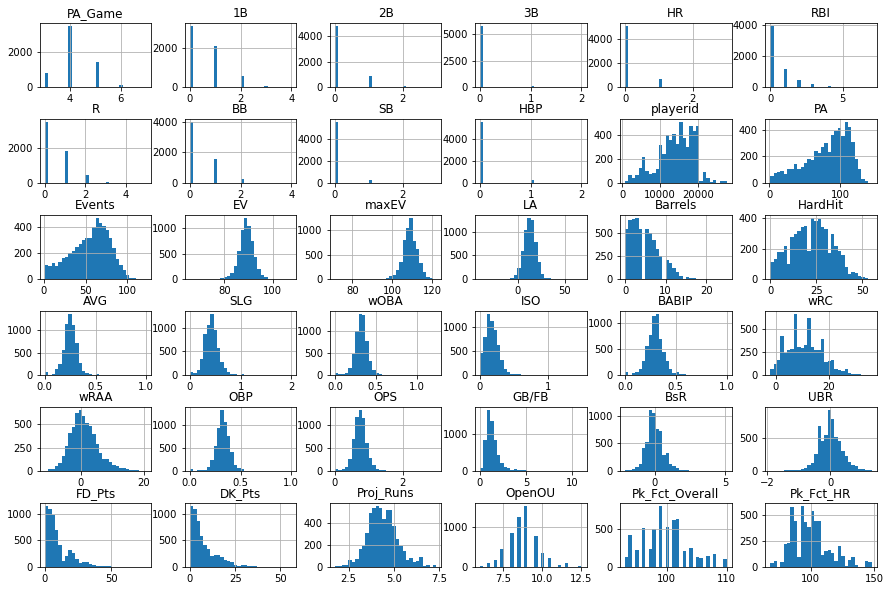

In [421]:
main_df_non_pct.hist(figsize=(15,10), bins = 30)
plt.subplots_adjust(hspace=0.5);

Those first nine variables have a limited number of possible values. We're expect the vast majority of our observations to have 0 in those columns, especially HR and 3B.

# Next histogram
OK so some of the variables in the previous histogram were actually percentages, they just weren't the ones we had to change from objects. Here's the rest of the numerical features.

In [422]:
main_df_pct_feats = main_df.iloc[:, 42:]

In [423]:
main_df_pct_feats.head()

,Barrel%,HardHit%,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,O-Swing%,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
0,10.9,32.8,7.5,20.4,26.6,37.5,35.9,26.1,17.4,34.7,...,79.5,37.9,46.2,9.5,31.3,39.1,29.7,43.8,35.9,20.3
1,5.0,35.0,11.1,22.2,20.7,50.0,29.3,5.9,5.9,28.8,...,76.3,43.4,57.8,11.4,13.3,60.0,26.7,35.0,30.0,35.0
2,13.0,52.2,3.9,27.5,26.1,39.1,34.8,8.3,20.8,50.2,...,67.1,35.1,67.6,19.1,20.3,40.6,39.1,42.0,31.9,26.1
3,2.9,41.2,6.7,15.6,23.5,44.1,32.4,36.4,9.1,31.0,...,83.1,37.0,55.6,6.5,20.6,47.1,32.4,35.3,35.3,29.4
4,4.1,36.5,8.3,23.9,28.4,35.1,36.5,3.7,3.7,35.8,...,77.7,43.8,76.1,11.4,23.0,54.1,23.0,33.8,37.8,28.4


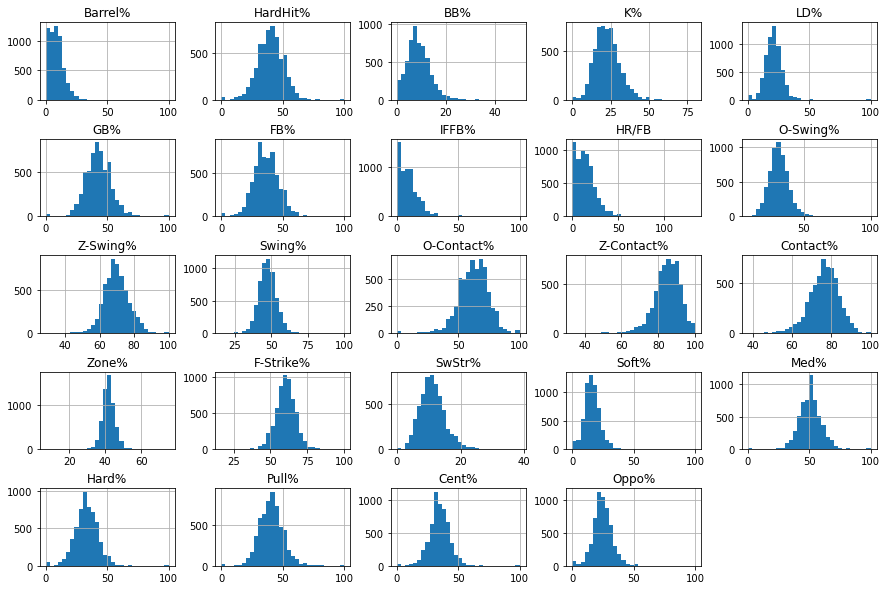

In [424]:
main_df_pct_feats.hist(figsize=(15,10), bins = 30)
plt.subplots_adjust(hspace=0.5);

There are going to be a few 100 percents because in some cases players might only have one or two plate appearances over the previous 30 days. So it's quite possible that 100 percent of the balls they hit are medium contact or ground balls or that they make contact with 100 percent of the pitches they swing at outside the strike zone.<br>

There does seem to be a value of more than 100 percent in the HR/FB (home runs per fly ball) histogram.<br>

In [425]:
main_df[main_df['HR/FB'] > 100]

,Date,Name,Team,Bats,Opp_Hand,Park,PA_Game,1B,2B,3B,...,Contact%,Zone%,F-Strike%,SwStr%,Soft%,Med%,Hard%,Pull%,Cent%,Oppo%
749,2021-05-13,Andy Young,ARI,R,L,ARI,4,0,0,0,...,45.0,29.0,60.0,17.7,20.0,0.0,80.0,20.0,20.0,60.0


Not every home run has to be a fly ball. A home run also can come on a line drive. So it's possible to hit more home runs than fly balls.

# Handedness matchup categorical variable
We'll create four categorical variables by handedness matchups<br>

right-handed batters vs. right-handed pitchers<br>
switch-hitters and left-handed batters vs. right-handed pitchers<br>
left-handed batters vs. left-handed pitchers<br>
switch-hitters and right-handed batters vs. left-handed pitchers<br>

We're going to assume that switch-hitters choose to bat on the side of the plate opposite the pitcher's handedness.<br>

We're going to assign numeric values to each of these categories. We'll see in the boxplot a few cells down that LvL matchups are the least advantageous for the hitter. We'll assign 1 to that. The others are RvR: 1.3, SRvL: 1.4 and SLvR: 1.5. We clustered the last three numbers a little more because it's clear from the boxplot that we lose a lot of variance in LvL matchups, and the distinction among the other three is a little less clear.

In [426]:
conds = [(main_df['Bats'] == 'R') & (main_df['Opp_Hand'] == 'R'), \
         (main_df['Bats'] != 'R') & (main_df['Opp_Hand'] == 'R'),\
        (main_df['Bats'] == 'L') & (main_df['Opp_Hand'] == 'L'),\
        (main_df['Bats'] != 'L') & (main_df['Opp_Hand'] == 'L')]
choices = [1.3, 1.5, 1, 1.4]

In [427]:
main_df['Hnd_Mtch'] = np.select(conds, choices)

In [428]:
main_df['Hnd_Mtch'].value_counts()

1.3    2130
1.5    1808
1.4    1439
1.0     407
Name: Hnd_Mtch, dtype: int64

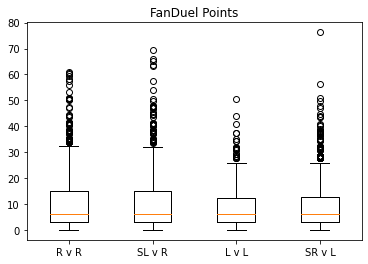

In [429]:
fig, ax = plt.subplots()
ax.boxplot([main_df[main_df['Hnd_Mtch'] == 1.3]['FD_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1.5]['FD_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1]['FD_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1.4]['FD_Pts']])
ax.set_xticklabels(['R v R', 'SL v R', 'L v L', 'SR v L'])
ax.set_title('FanDuel Points');

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([main_df[main_df['Hnd_Mtch'] == 1.3]['DK_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1.5]['DK_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1]['DK_Pts'], \
            main_df[main_df['Hnd_Mtch'] == 1.4]['DK_Pts']])
ax.set_xticklabels(['R v R', 'SL v R', 'L v L', 'SR v L'])
ax.set_title('DraftKings Points');

The only one of these four that stands out is the lefty vs lefty (LvL) matchups. The outliers are much less extreme.

# Correlations (here's where the problems start)
We tried doing a pairplot, but with more than 60 features it took too much time. We did a heatmap, but with 60 features it was difficult to read. So let's pare down the features before doing a heatmap. We'll do this by looking at a ranked list of correlations with our target variables.<br>

The correlations at the top of the list, unfortunately, are not features. Those are the stats from the day of the observed game that we used to calculate fantasy points. It would stand to reason that those correlate with fantasy points.<br>

Of the features that we hoped would be predictive, the best is 'Barrels," and that Pearson R score is only .1. HardHit, Barrels and wRC are the most correlated features for both DraftKings and FanDuel points, but those correlations all are weak.

Remember our target variables are 'FD_Pts' and 'DK_Pts.' We also have a third sorted correlation list that checks correlations with home runs 'HR.' We thought about making that the target variable instead, as hitting a home run guarantees 18.7 FanDuel points and 14 DraftKings points. But the correlations with home runs don't look any better.

In [ ]:
main_df_corr = main_df.corr()

In [ ]:
main_df_corr_sorted = main_df_corr.unstack().sort_values(ascending = False)

In [ ]:
main_df_corr_sorted.loc['FD_Pts']

In [ ]:
main_df_corr_sorted.loc['DK_Pts']

In [ ]:
main_df_corr_sorted.loc['HR']

# The best of the worst
So let's make a list of every feature with a Pearson R of at least .05, and use those to make our heat map. Our handedness categorical variables don't even make this list.

In [ ]:
stronger_corr = ['FD_Pts', 'DK_Pts', 'HR', 'Barrels', 'Date', 'Name', 'Bats', 'Opp_Hand', 'Park', 'HardHit', 'wRC', 'maxEV', 'Proj_Runs', 'EV', 'PA', 'HardHit%', 'Hard%', 'wOBA', 'OPS', 'wRAA', 'Events', \
 'SLG', 'Barrel%', 'OBP', 'ISO', 'Pk_Fct_Overall', 'OpenOU', 'HR/FB', 'AVG', 'BB%', 'Pk_Fct_HR', 'Med%', 'Zone%' \
'Park_Fct_HR', 'FB%', 'LA', 'SwStr%', 'Z-Contact%', 'O-Contact%', 'GB%', 'GB/FB', 'Contact%']

In [ ]:
main_df_heat = main_df[main_df.columns[main_df.columns.isin(stronger_corr)]]

In [ ]:
main_df_heat.head()

In [ ]:
main_df_heat.corr()

# Heatmap thoughts
ISO, AVG, SLG, wOBA, wRC, wRAA, OBP and OPS all seem to be strongly correlated with each other (genuinely, like wOBA and ISO have a Pearson R of .74), just not with our target variables.

In [ ]:
fig, ax = plt.subplots(figsize = (30, 30))
title = 'MLB DFS Heat Map'
sns.heatmap(main_df_heat.corr(), annot = True)
plt.show()

# Scatterplots
These scatterplots are a mess, as our three most predictive features still have very weak correlations with our target variables. The first row is HardHit, which is the number of times a ball is hit with an exit velocity of more than 95 mph. This correlates slightly better than HardHit%, which is the percentage of EV > 95 mph per batted-ball event.<br>

Barrels are  metric based on exit velocity (EV) and launch angle (LA). The "barrel zone" begins at an EV of 98 with an LA of 26-30. As the EV increases, the range of LA within the barrel zone increases. As with HardHit, the pure number of these events correlates better than the percentage per batted-ball event.<br>

wRC (weighted runs created) is a derivative of wOBA (weighted on-base average). wOBA measures offensive value and places increasingly greater weight on BB, HBP, 1B, 2B, 3B and HR, in that order. wRC is similar to wOBA but also takes ballpark factors into account<br>

Again, these three best correlations still are weak. We've included how they correlate with home runs just for a cleaner scatterplot and also to demonstrate how anchored at zero everything is. We've said before that it is not uncommon for even the best hitters to score 0 fantasy points every now and then.<br>

We're chasing outliers here, and we don't even have a clear pattern for the extreme outliers. Some players scored a ton of fantasy points with weak predictive statistics.

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
features = ['HardHit', 'Barrels', 'wRC']
targets = ['FD_Pts', 'DK_Pts', 'HR']
for i in range(3):
    for j in range(3):
        ax[i][j].scatter(x = main_df[features[i]], y = main_df[targets[j]])
        ax[i][j].set_xlabel(features[i])
        ax[i][j].set_ylabel(targets[j])
plt.show()

# Here's what we tried (none of it worked):
- Using spearman and kendall methods in the corr function<br>
- Scaling the features<br>
- Setting a floor of 80 plate appearances so it reduces the dataset to everyday players and excludes fringe players.<br>
- We tried to simulate salary data and use points-per-dollar as a target variable<br>
- We dipped our toe into the pool of wrangling pitching stats by adding a feature of cumulative relief pitcher stats for each opposing team. Still, we saw no correlations stronger than .1.<br>

# What now?
- Is this the kind of thing where a random forest model would be best? Our vague understanding of random forest is that it tries to find which features work best together.<br>
- What about quantile regression? We tried reading up on that, but that's going to take some mental weightlifting. 
- What if our target variable was binary: home run or no home run?, and we used a decision-tree model? As we said earlier, a home run gets 18.7 FanDuel points (12 pts for the HR, 3.5 for the RBI and 3.2 for the run scored) and 14 on DraftKings (10, 2, 2). The main thing a DFS player looks for in rostering hitters is whether that hitter will hit a home run that night. Of our 5784 observations, 5024 have no home runs. That leaves only 760 players with at least one home run. So maybe even True is an extreme outlier if we went with a binary target variable.<br>
- As a last resort, we could wrangle stats for each specific observation's opposing starting pitcher. It would be the same type of variables we have now, but a measure of those stats for hitters against that particular pitcher. We also could add these stats against each team's relief pitchers, cumulative. We would probably get the same correlations, but the question is would three correlations of .1 be any better than one? If we go this route, we'd probably only have time to do enough data wrangling for the minimum prescribed 3000 observations.<br>
- As an absolute last resort, we could fall back on our original capstone that predicted home runs per season. We took a peek there and found 12 features with a correlation of .5 (as in half of one) or better with our target variable. This could expedite the capstone project since we might be looking at a linear model, but this model would be useless outside the academic setting of Springboard. We would become more familiar with machine learning but it's not a model that could be used anywhere in real life.<br>
- That said, people have done baseball DFS models. We've seen articles about it. Again, a little beyond the scope of our understanding at this point, but apparently this has been done.<br>
- Perhaps our best hope is that somehow we can work with the correlations we have.